<div class="pull-right"><img src="https://eant.tech/imagenes/logo.png"/></div/>

# <font color='violet'> Breast Cancer Wisconsin Data </font>

## <font color='purple'> Trabajo Práctico: Programa "Data Scientist" </font>
#### <font color='steelblue'> Gisela Soledad Morrone </font>

# Breast Cancer Wisconsin Data

El dataset que se va a utilizar es un dataset con información de tumores, tanto malignos como beningnos. La variable que se quiere predecir es *dignosis*, a partir de datos que fueron clasificados de imagenes de los tumores.

Las variables fueron computadas de una imagen digitalizada con un aspirado de una aguja fina (FNA) de una masa del seno. Describen caracteristicas de los nucleos celulares presentes en la imagen. 

Informacion de las variables:

1. ID 
2. Diagnosis (M = maligno, 
    B = benigno)
3. (3-32) 10 valores computados para cada nucleo celular:
    - radius -> distancia del centro hasta puntos en perimetros
    - texture -> desviacion standar en scalas de grises de los valores
    - perimeter
    - area
    - smoothness -> variación local en longitudes de radio
    - compactness -> (perimeter^2 / area - 1.0)
    - concavity -> Gravedad de las porciones cóncavas del contorno
    - concave points -> Número de porciones cóncavas del contorno
    - symmetry
    - fractal dimension -> aproximación a la costa
    
Cada una de las variables de la 3 a la 32 estan computadas 3 veces, teniendo el valor MEAN (valor promedio de las mediciones para la imagen), SE (error estadar), WORST (peor valor). 

Se eligio este dataset para el analisis, dado que me resulto interesante poder hacer un analisis sobre un tema de salud, y poder ver si es realmente posible a partir de imagenes digitalizadas llegar a la conclusion de si una persona tiene o no cancer. 

## Import Librerias

In [1]:
#Ignorar Warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

#importar archivo de funciones de usuario
import import_ipynb
import Functions as fun

importing Jupyter notebook from Functions.ipynb


## Import de los datos

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

Antes de comenzar con el analisis de variables, se convierte la variable objetivo en 1 y 0 para un analisis mas facil:
- M = 1
- B = 0

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

## Division Train - Test

In [5]:
X = df.drop(['diagnosis','id'], axis=1)

y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=382)

print('Train = ' , X_train.shape[0],'\nTest = ', X_test.shape[0])

Train =  455 
Test =  114


In [6]:
#Genero BKP de los dataset de training y test
X_train_bkp = X_train.copy()
X_test_bkp = X_test.copy()
y_train_bkp = y_train.copy()
y_test_bkp = y_test.copy()

En Train hay 277 observaciones de tumores Benignos y 178 observaciones  de tumores Malignos.
En Test hay 80 observaciones de tumores Benignos y 34 observaciones de tumores Malignos.


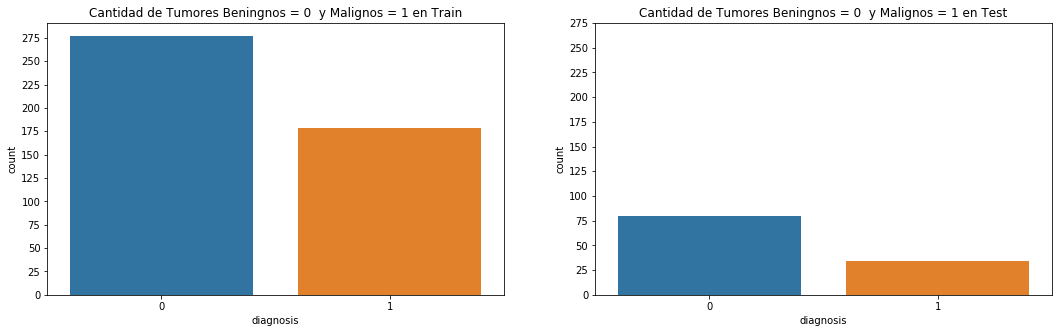

In [7]:
#Chequeo cuantos casos de Tumores Benignos y Malignos quedaron por dataset
f,ax=plt.subplots(1,2,figsize=(18,5))
sb.countplot(y_train,label="Cant",ax=ax[0])
ax[0].set_title('Cantidad de Tumores Beningnos = 0  y Malignos = 1 en Train')
ax[0].set_yticks(range(0,300,25))
sb.countplot(y_test,label="Cant",ax=ax[1])
ax[1].set_title('Cantidad de Tumores Beningnos = 0  y Malignos = 1 en Test')
ax[1].set_yticks(range(0,300,25))
B_train, M_train = y_train.value_counts()
B_test, M_test = y_test.value_counts()
print('En Train hay {} observaciones de tumores Benignos y {} observaciones  de tumores Malignos.\nEn Test \
hay {} observaciones de tumores Benignos y {} observaciones de tumores Malignos.'.format(B_train,M_train,B_test,M_test))
plt.show()

# Analisis de Datos

In [8]:
#Busco Nulos
X_train.isnull().values.any()

False

## Seleccion de Variables - CORRELACION

Las variables se dividen en 3 grupos:
- 0-10 mean
- 10-20 se
- 20-31 worst

Por lo que se va a analizar la correlacion de variables entre las variables dentro de esos 3 grupos.

Al haber correlacion entre las variables, se puede eliminar alguna de ellas y conservar la otra. Para esto se va a analizar como se calculan estas variables, los outliers que puedan tener y los graficos de las mismas para ver sus correlaciones.

Tomando como referencia para analisis los valores por arriba de 0.85

### *MEAN*

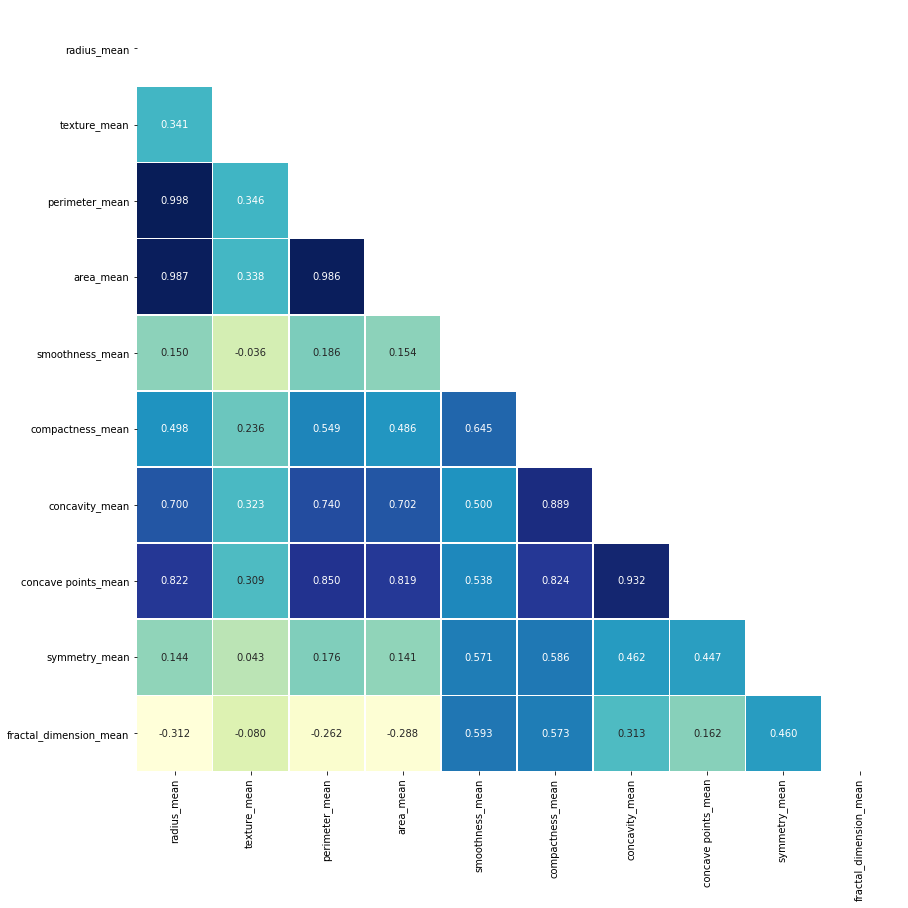

In [9]:
f,ax = plt.subplots(figsize=(14, 14))
mask = np.zeros_like(X_train.iloc[:,0:10].corr())
mask[np.triu_indices_from(mask)] = True
with sb.axes_style("white"):
    ax = sb.heatmap(X_train.iloc[:,0:10].corr(),annot=True, mask=mask,  linewidths=.5, fmt= '.3f',\
                    square=True,cbar=False,cmap="YlGnBu")
plt.show()

Del gráfico se puede ver que:
- `radius_mean` esta fuertemente correlacionada con `perimeter_mean` y `area_mean`
- `perimeter_mean` esta correlacionada en menor medida con `concave points_mean`
- `compactness_mean` esta correlacionada en gran medida con `concavity_mean`
- `concavity_mean` esta correlacionada en gran medida con `concave points_mean`

#### Radius_mean - perimeter_mean - area_mean

In [10]:
a = X_train[X_train.radius_mean > X_train.radius_mean.quantile(0.9)]
b = X_train[X_train.perimeter_mean > X_train.perimeter_mean.quantile(0.9)]
c = X_train[X_train.area_mean > X_train.area_mean.quantile(0.9)]
print('Hay {} observaciones por encima del quantile 90 para radius_mean.\n\
Hay {} observaciones por encima del quantile 90 para perimeter_mean.\n\
Hay {} observaciones por encima del quantile 90 para area_mean.'.format(a.shape[0],b.shape[0],c.shape[0]))

Hay 45 observaciones por encima del quantile 90 para radius_mean.
Hay 46 observaciones por encima del quantile 90 para perimeter_mean.
Hay 46 observaciones por encima del quantile 90 para area_mean.


Se va a utilizar un **Pair Grid Plot** para graficar las 3 variables juntas para ver que tan correlacionadas estan. 

En la diagonal se puede observar el comportamiento de cada una de las variables, y como podemos ver los graficos de las 3 son muy similares (en otros rangos numericos, dado que no estan escaladas las variables).

En la parte inferior se observa la densidad de la distribucion de la cobinacion de las variables que se cruzan en esa combinacion y en la parte superior se usa un scatter plot para mostrar la relacion entre ambas variables.

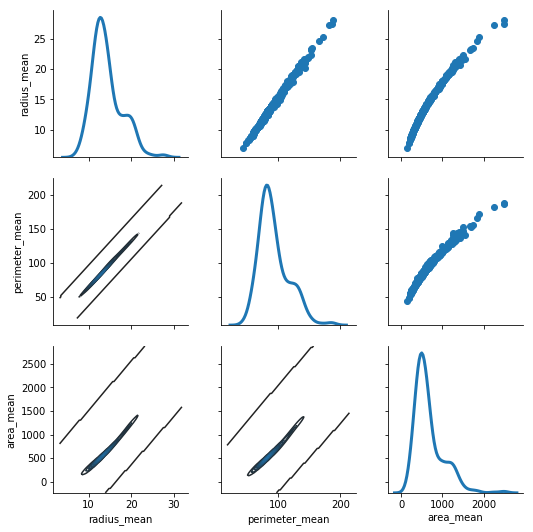

In [11]:
sub_set = X_train.loc[:,['radius_mean','perimeter_mean','area_mean']]
g = sb.PairGrid(sub_set, diag_sharey=False)
g.map_lower(sb.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sb.kdeplot, lw=3)
plt.show()

Dado este analisis y sabiendo que los tumores tienen una forma similar a la circular, y el calculo del area y el perimetro se hace en base al radio, tiene sentido que las 3 variables esten correlacionadas. Dado que el radio tiene menos outliers, se van a eliminar el `perimetro` y el `area`.

#### perimeter_mean - concave points_mean

In [12]:
b = X_train[X_train.loc[:,'concave points_mean'] > X_train.loc[:,'concave points_mean'].quantile(0.9)]
b = X_train[X_train.perimeter_mean > X_train.perimeter_mean.quantile(0.9)]
print('Hay {} observaciones por encima del quantile 90 para concave points_mean.\n\
Hay {} observaciones por encima del quantile 90 para perimeter_mean.'.format(a.shape[0],b.shape[0]))

Hay 45 observaciones por encima del quantile 90 para concave points_mean.
Hay 46 observaciones por encima del quantile 90 para perimeter_mean.


En este caso como las variables a analizar son 2 se va a generar un **JointPlot** para ver como estan correlacionadas.

En el centro del grafico se puede observar la relacion entre las variables, y por fuera del grafico se ve el grafico de cada una de las variables.

Estas dos variables tienen una correlacion bastante menor que el resto de las halladas (0.85), de todas maneras, como en el paso anterior ya se decidio que `perimeter_mean` iba a ser eliminada por su correlacion con `radius_mean` no es necesario hacer mas en este punto.

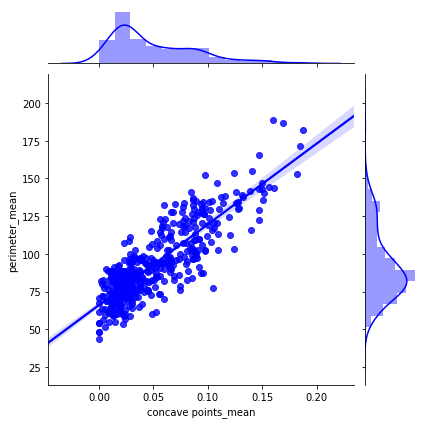

In [14]:
sb.jointplot(X_train.loc[:,'concave points_mean'], X_train.loc[:,'perimeter_mean'], kind="reg", color="b")
plt.show()

#### compactness_mean - concavity_mean

Aca pasa lo mismo que en el caso anterior, como son dos variables para ver la correlacion hago un **JointPlot**. De este puedo observar que las variables son bastante parecidas, pero tienen alguna diferencia. 

En particular se puede observaar que `compactness_mean` tiene mayor distibucion de valores que `concavity_mean`

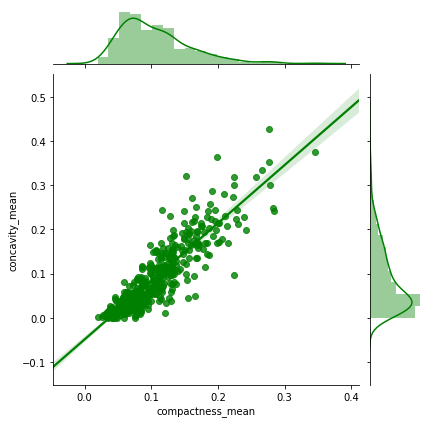

In [15]:
sb.jointplot(X_train.loc[:,'compactness_mean'], X_train.loc[:,'concavity_mean'], kind="reg", color="g")
plt.show()

In [16]:
a = X_train[X_train.compactness_mean > X_train.compactness_mean.quantile(0.9)]
b = X_train[X_train.concavity_mean > X_train.concavity_mean.quantile(0.9)]
print('Hay {} observaciones por encima del quantile 90 para compactness_mean.\n\
Hay {} observaciones por encima del quantile 90 para concavity_mean.'.format(a.shape[0],b.shape[0]))

Hay 46 observaciones por encima del quantile 90 para compactness_mean.
Hay 46 observaciones por encima del quantile 90 para concavity_mean.


En este caso ambas variables tienen la misma cantidad de outliers, por lo que voy a eliminar `concavity_mean` dado que es la que tienen menos varianza en sus valores. Como de todas formas, `concavity_mean` tiene una correlacion mas con otra variable, antes de eliminar voy a ver que surje de ese analisis.

#### concavity_mean - concave points_mean

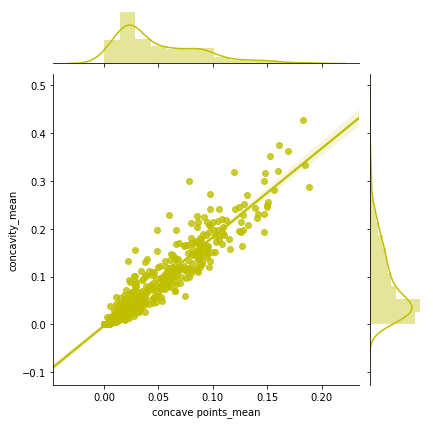

In [17]:
sb.jointplot(X_train.loc[:,'concave points_mean'], X_train.loc[:,'concavity_mean'], kind="reg", color="y")
plt.show()

Del grafico anterior se puede observar que las variables estan fuertemente correlacionadas, y ademas se puede observar que tienen graficos muy similares.

In [18]:
b = X_train[X_train.loc[:,'concave points_mean'] > X_train.loc[:,'concave points_mean'].quantile(0.9)]
b = X_train[X_train.concavity_mean > X_train.concavity_mean.quantile(0.9)]
print('Hay {} observaciones por encima del quantile 90 para concave points_mean.\n\
Hay {} observaciones por encima del quantile 90 para concavity_mean.'.format(a.shape[0],b.shape[0]))

Hay 46 observaciones por encima del quantile 90 para concave points_mean.
Hay 46 observaciones por encima del quantile 90 para concavity_mean.


Del grafico superior se puede observar que `concave points_mean` tiene outliers en un rango mayor de valores, por eso se elimina esa variable.
Al eliminar esta, del analisis anterior, se va a eliminar `compactness_mean`

##### Por lo tanto se van a eliminar:
    - perimeter_mean
    - area_mean
    - concave points_mean
    - compactness_mean

### *SE*

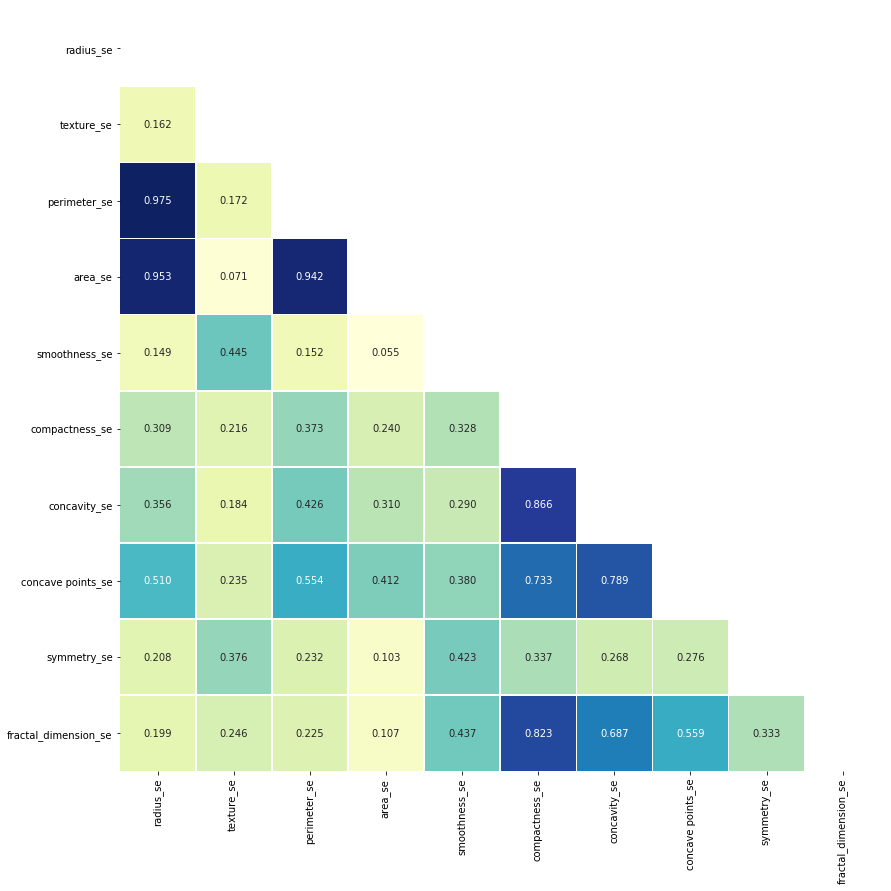

In [19]:
f,ax = plt.subplots(figsize=(14, 14))
mask = np.zeros_like(X_train.iloc[:,10:20].corr())
mask[np.triu_indices_from(mask)] = True
with sb.axes_style("white"):
    ax = sb.heatmap(X_train.iloc[:,10:20].corr(),annot=True, mask=mask,vmax=1,  linewidths=.5, fmt= '.3f',\
                     square=True,cbar=False,cmap="YlGnBu")
plt.show()

Del gráfico se puede ver que:
- `radius_se` esta fuertemente correlacionada con `perimeter_se` y `area_se`
- `compactness_se` esta correlacionada en gran medida con `concavity_se`

#### Radius_se - perimeter_se - area_se

Al igual que en el caso del conjunto _MEAN_ se podria asumir que como el perimetro y el area son un calculo del radio se podrian eliminar `perimeter_se` y `area_se`

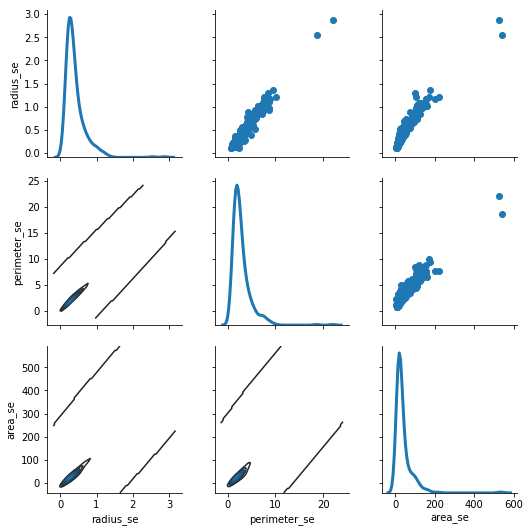

In [20]:
sub_set = X_train.loc[:,['radius_se','perimeter_se','area_se']]
g = sb.PairGrid(sub_set, diag_sharey=False)
g.map_lower(sb.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sb.kdeplot, lw=3)
plt.show()

Del grafico se puede observar que las variables estan fuertemente correlacionadas, y sus graficos son bastante similares, por lo tanto al igual que para el conjunto de variables _MEAN_ se va a eliminar `perimeter_se` y `area_se`

#### compactness_se - concavity_se

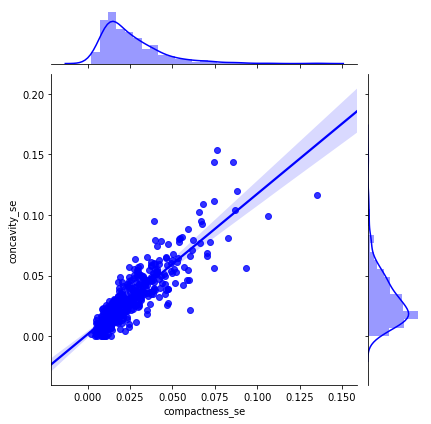

In [21]:
sb.jointplot(X_train.loc[:,'compactness_se'], X_train.loc[:,'concavity_se'], kind="reg", color="b")
plt.show()

In [22]:
a = X_train[X_train.compactness_se > X_train.compactness_se.quantile(0.9)]
b = X_train[X_train.concavity_se > X_train.concavity_se.quantile(0.9)]
print('Hay {} observaciones por encima del quantile 90 para compactness_se.\n\
Hay {} observaciones por encima del quantile 90 para concavity_se.'.format(a.shape[0],b.shape[0]))

Hay 46 observaciones por encima del quantile 90 para compactness_se.
Hay 46 observaciones por encima del quantile 90 para concavity_se.


Del grafico superior se puede ver que las variables estan correlacionadas, y tienen graficos bastantes similares. Como ambas tienen las mismas cantidad de outliers, voy a eliminar `compactness_se` dado que del grafico de `compactness_se` se puede observar que esta tienen menos varianza en sus valores.

##### Por lo tanto se van a eliminar:
    - perimeter_se
    - area_se
    - compactness_se

### *WORST*

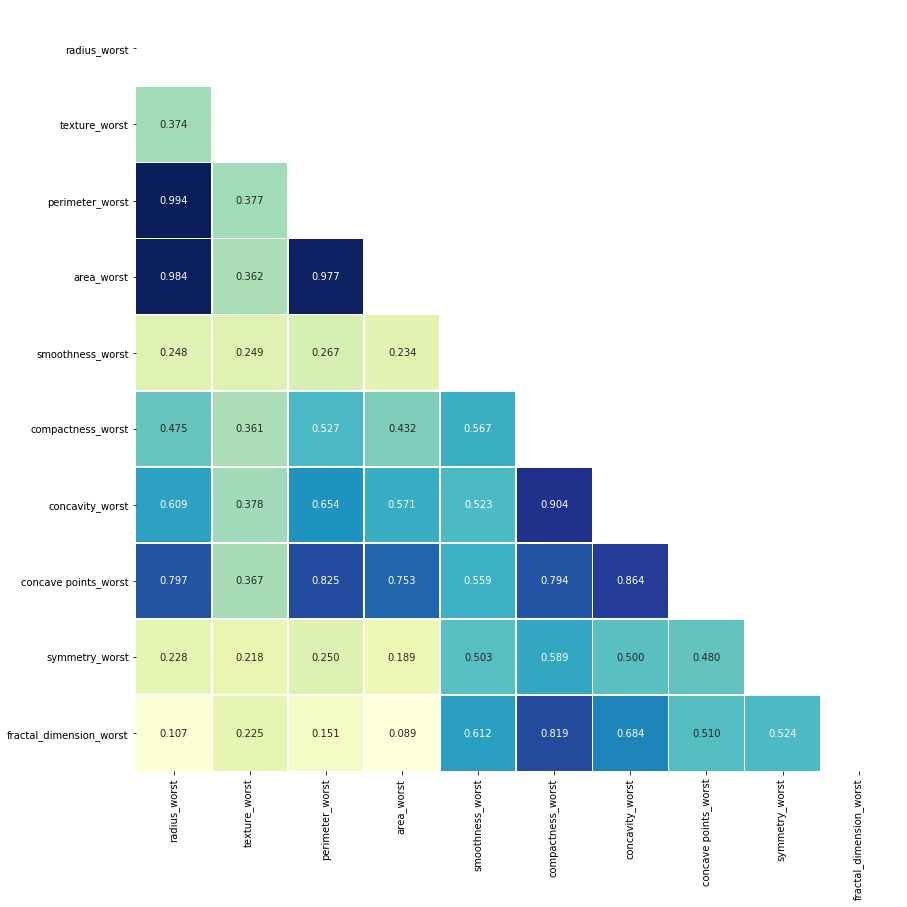

In [23]:
f,ax = plt.subplots(figsize=(14, 14))
mask = np.zeros_like(X_train.iloc[:,20:31].corr())
mask[np.triu_indices_from(mask)] = True
with sb.axes_style("white"):
    ax = sb.heatmap(X_train.iloc[:,20:31].corr(),annot=True, mask=mask,vmax=1,  linewidths=.5, fmt= '.3f',\
                     square=True,cbar=False,cmap="YlGnBu")
plt.show()

Del gráfico se puede ver que:
- `radius_worst` esta fuertemente correlacionada con `perimeter_worst` y `area_worst`
- `compactness_worst` esta correlacionada en gran medida con `concavity_worst`
- `concavity_worst` esta correlacionada con `concave points_worst`

#### Radius_se - perimeter_se - area_se

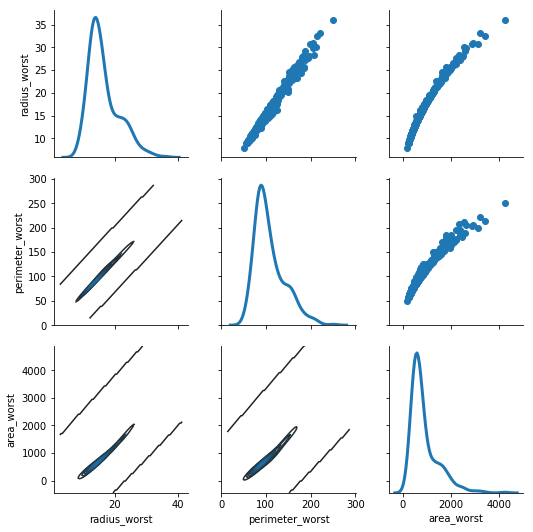

In [24]:
sub_set = X_train.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sb.PairGrid(sub_set, diag_sharey=False)
g.map_lower(sb.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sb.kdeplot, lw=3)
plt.show()

Al igual que el conjunto de variables _MEAN_ y _SE_ se puede observar que esta fuertemente correlacionadas y que tienen graficos muy similares. Por lo tanto se va a tomar la misma logica que para los dos grupos anteriores eliminando `perimeter_worst` y `area_worst`

#### compactness_worst - concavity_worst 

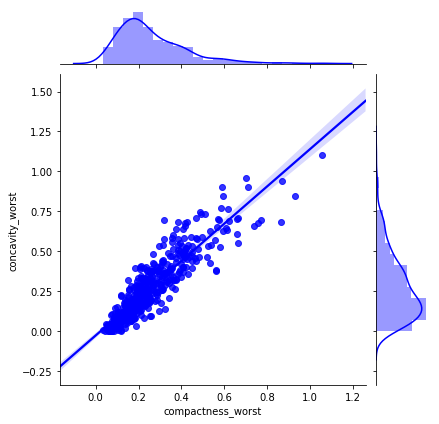

In [25]:
sb.jointplot(X_train.loc[:,'compactness_worst'], X_train.loc[:,'concavity_worst'], kind="reg", color="b")
plt.show()

In [26]:
a = X_train[X_train.compactness_worst > X_train.compactness_worst.quantile(0.9)]
b = X_train[X_train.concavity_worst > X_train.concavity_worst.quantile(0.9)]
print('Hay {} observaciones por encima del quantile 90 para compactness_worst.\n\
Hay {} observaciones por encima del quantile 90 para concavity_worst.'.format(a.shape[0],b.shape[0]))

Hay 46 observaciones por encima del quantile 90 para compactness_worst.
Hay 46 observaciones por encima del quantile 90 para concavity_worst.


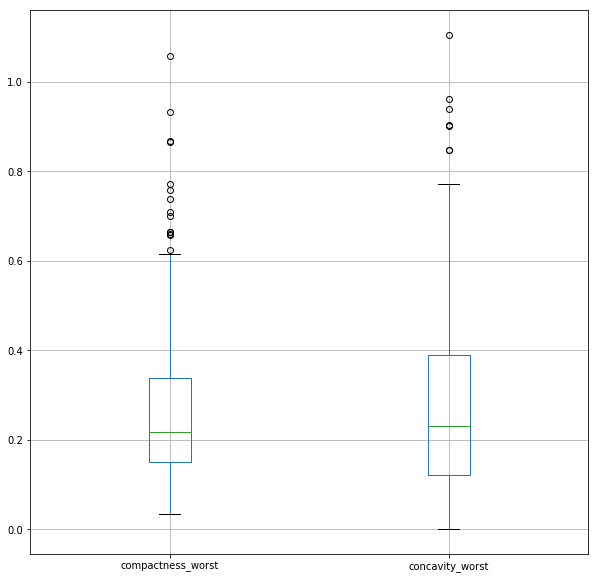

In [27]:
plt.subplots(figsize=(10, 10))
X_train[['compactness_worst','concavity_worst']].boxplot()
plt.show()

Del grafico de arriba se puede ver que las variables estan fuertemente correlacionadas, y tienen graficos bastante similares. Del grafico **BOXPLOT** se puede ver que `compactness_worst` tiene los outliers mas distribuidos por lo tanto se la va a eliminar.

#### concavity_worst - concave points_worst 

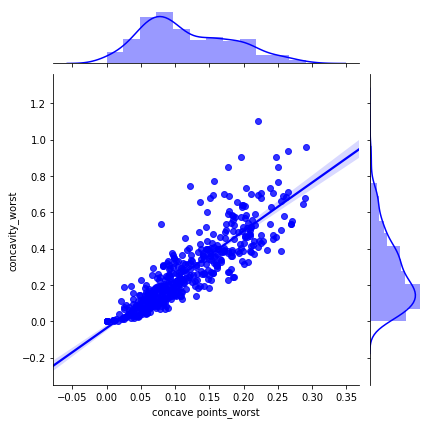

In [28]:
sb.jointplot(X_train.loc[:,'concave points_worst'], X_train.loc[:,'concavity_worst'], kind="reg", color="b")
plt.show()

In [29]:
a = X_train[X_train.loc[:,'concave points_worst'] > X_train.loc[:,'concave points_worst'].quantile(0.9)]
b = X_train[X_train.concavity_worst > X_train.concavity_worst.quantile(0.9)]
print('Hay {} observaciones por encima del quantile 90 para concave points_worst.\n\
Hay {} observaciones por encima del quantile 90 para concavity_worst.'.format(a.shape[0],b.shape[0]))

Hay 46 observaciones por encima del quantile 90 para concave points_worst.
Hay 46 observaciones por encima del quantile 90 para concavity_worst.


Como ambas tienen la misma cantidad de outliers se va a eliminar `concave points_worst`

##### Por lo tanto se van a eliminar:
    - perimeter_worst
    - area_worst
    - compactness_worst
    - concave points_worst

##### Eliminacion de las variables seleccionadas del analisis por grupos _MEAN_ - _SE_ - _WORST_

In [30]:
X_train.drop(['perimeter_mean' ,'area_mean','concave points_mean' ,'compactness_mean',\
              'perimeter_se' ,'area_se', 'compactness_se', \
              'perimeter_worst', 'area_worst', 'compactness_worst', 'concave points_worst']\
             , axis=1,inplace = True)

In [31]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [32]:
print("Con el analisis de correlación por grupos se quitaron {} variables."\
      .format(X_train_bkp.shape[1] - X_train.shape[1]))

Con el analisis de correlación por grupos se quitaron 11 variables.


In [33]:
#Guardo en una variable la cantidad de variables que tiene el dataframe despues del analisis de correlacion 
var_dCor = X_train.shape[1]

## Seleccion de Variables - Analisis de clasificacion de cada variables

Se va a generar un grafico **Violinpoint** para ver como cada una de las variables ayuda a clasificar la variable objetivo.

Para poder graficar todas las variables en el mismo grafico se las va a estandarizar, y para poder luego realizar el grafico se tiene que juntar las **variables (X_train)** con la **variable objetico (y_train)**

In [34]:
#Estandarizacion
X_train_stand = (X_train - X_train.mean()) / (X_train.std())  
X = pd.concat([X_train_stand,y_train],axis = 1)

In [35]:
X_melt = pd.melt(X,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

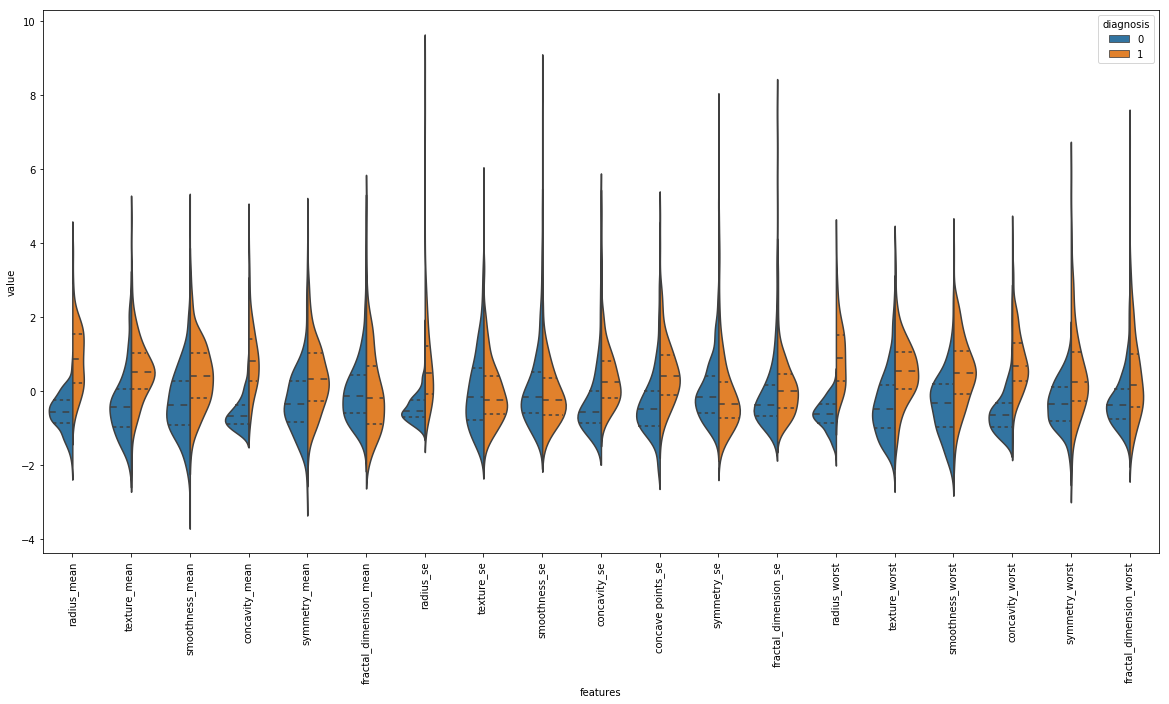

In [36]:
#Violinpoint
X_melt = pd.melt(X,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sb.violinplot(x="features", y="value", hue="diagnosis", data=X_melt,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Del gráfico anterior se puede ver:
- smoothness_mean
- symmetry_mean
- fractal_dimension_mean
- texture_se
- smoothness_se
- symmetry_se
- fractal_dimension_se
- symmetry_worst
- fractal_dimension_worst

No tienen una gran diferencia entre B y M, por lo tanto se va a proceder a eliminarlas

In [37]:
X_train.drop(['smoothness_mean','symmetry_mean','fractal_dimension_mean','texture_se','smoothness_se',\
             'symmetry_se','fractal_dimension_se','symmetry_worst','fractal_dimension_worst'\
             ], axis=1,inplace = True)

In [38]:
print("Con el analisis de violinpoint se quitaron {} variables.".format(var_dCor - X_train.shape[1]))

Con el analisis de violinpoint se quitaron 9 variables.


In [39]:
X_train.shape

(455, 10)

In [40]:
X_train.describe()

,radius_mean,texture_mean,concavity_mean,radius_se,concavity_se,concave points_se,radius_worst,texture_worst,smoothness_worst,concavity_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.249341,19.341275,0.089780,0.409925,0.031361,0.011869,16.457314,25.782440,0.132649,0.275394
std,3.511468,4.287985,0.076417,0.281351,0.023325,0.005775,4.869058,6.192942,0.022581,0.201156
min,6.981000,10.380000,0.000000,0.111500,0.000000,0.000000,7.930000,12.490000,0.081250,0.000000
25%,11.825000,16.195000,0.030740,0.237150,0.015215,0.007971,13.080000,21.140000,0.117200,0.120350
50%,13.530000,18.900000,0.064760,0.330500,0.026360,0.011070,15.100000,25.530000,0.131600,0.229800
75%,16.080000,21.890000,0.135550,0.480700,0.042660,0.014935,19.125000,29.880000,0.145800,0.388400
max,28.110000,39.280000,0.426400,2.873000,0.153500,0.039270,36.040000,49.540000,0.222600,1.105000


Con el analisis de correlación por grupos se quitaron 11 variables. Y con el analisis de clasificacion se eliminaron 9 variables mas, dejando el dataframe con 10 variables

## Seleccion de Variables - Automatico

### Seleccion Recursivo

In [41]:
clf = DecisionTreeClassifier(max_depth = 20)

selector = RFE(clf, n_features_to_select=10, step=1)
selector = selector.fit(X_train_bkp, y_train_bkp)
mask = selector.support_

In [42]:
XR = X_train_bkp.iloc[:,np.append(np.array([True,True]),mask)]

In [43]:
print("Con la seleccion Recursiva el dataframe queda con {}.".format(XR.shape[1] ))

Con la seleccion Recursiva el dataframe queda con 12.


### Analisis de Poca Varianza

In [44]:
sel = VarianceThreshold(threshold=(0.01))
X_thr = sel.fit_transform(X_train_bkp)
mask = sel.fit(X_train_bkp).get_support()
print("Se quitaron {} columnas a partir de remover las de baja varianza.".format(X_train_bkp.shape[1] - X_thr.shape[1]))

XV = X_train_bkp.iloc[:,np.append(np.array([True,True]),mask)]
print("Con la seleccion de Poca Varianza el dataframe queda con {}.".format(XV.shape[1] ))

Se quitaron 16 columnas a partir de remover las de baja varianza.
Con la seleccion de Poca Varianza el dataframe queda con 16.


# Analisis de Outliers

## Dataframe X_train con analisis a mano

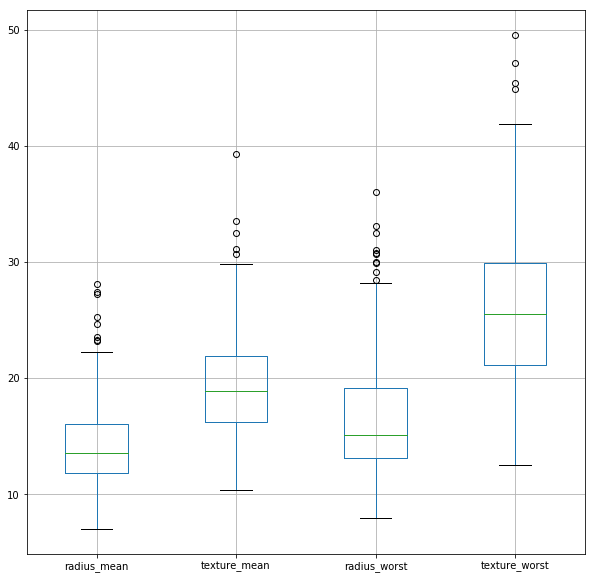

In [45]:
plt.subplots(figsize=(10, 10))
X_train[['radius_mean','texture_mean','radius_worst','texture_worst']].boxplot()
plt.show()

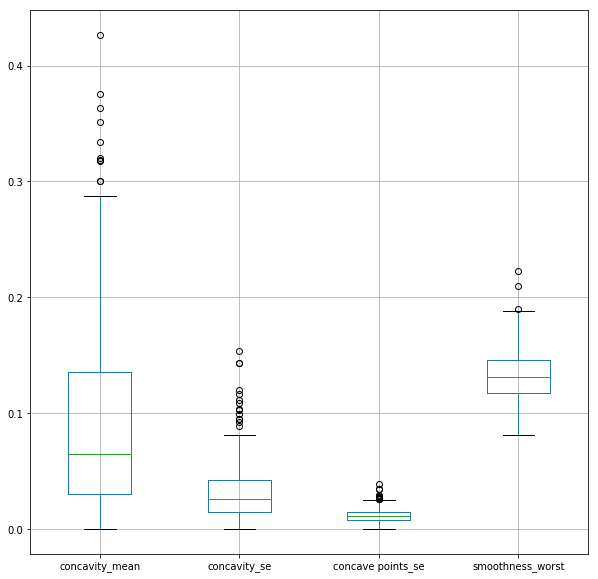

In [46]:
plt.subplots(figsize=(10, 10))
X_train[['concavity_mean','concavity_se',\
         'concave points_se','smoothness_worst']].boxplot()
plt.show()

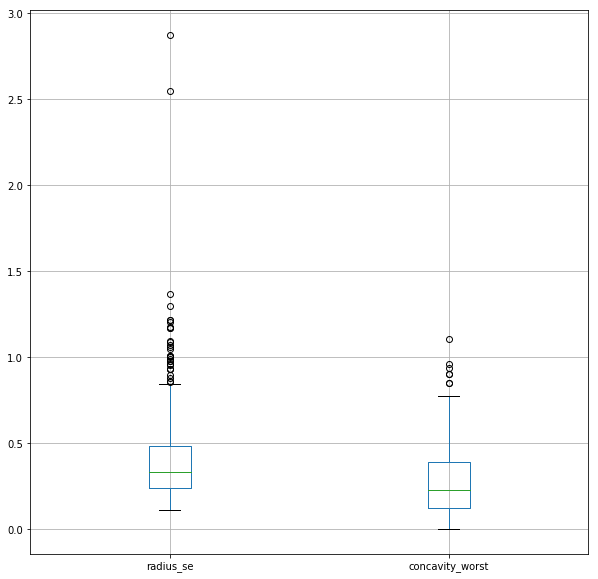

In [47]:
plt.subplots(figsize=(10, 10))
X_train[['radius_se','concavity_worst']].boxplot()
plt.show()

Analizo que cantidad de observaciones hay con outliers por arriba del quantile .9 para cada uno de las variables

In [48]:
a = X_train[X_train.radius_mean > X_train.radius_mean.quantile(0.90)]
b = X_train[X_train.texture_mean > X_train.texture_mean.quantile(0.90)]
c = X_train[X_train.radius_worst > X_train.radius_worst.quantile(0.90)]
d = X_train[X_train.texture_worst > X_train.texture_worst.quantile(0.90)]
e = X_train[X_train.concavity_mean > X_train.concavity_mean.quantile(0.90)]
f = X_train[X_train.concavity_se > X_train.concavity_se.quantile(0.90)]
g = X_train[X_train.loc[:,'concave points_se'] > X_train.loc[:,'concave points_se'].quantile(0.90)]
h = X_train[X_train.smoothness_worst > X_train.smoothness_worst.quantile(0.90)]
i = X_train[X_train.radius_se > X_train.radius_se.quantile(0.90)]
j = X_train[X_train.concavity_worst > X_train.concavity_worst.quantile(0.90)]


print('radius_mean: ' , a.shape[0],\
      '\ntexture_mean: ' , b.shape[0],\
      '\nradius_worst:', c.shape[0],\
      '\ntexture_worst: ',d.shape[0],\
      '\nconcavity_mean:',e.shape[0],\
      '\nconcavity_se:',f.shape[0],\
      '\nconcave points_se: ',g.shape[0],\
      '\nsmoothness_worst:',h.shape[0],\
      '\nradius_se:',i.shape[0],\
      '\nconcavity_worst:',j.shape[0])

radius_mean:  45 
texture_mean:  46 
radius_worst: 46 
texture_worst:  46 
concavity_mean: 46 
concavity_se: 46 
concave points_se:  46 
smoothness_worst: 46 
radius_se: 46 
concavity_worst: 46


In [49]:
X_train.shape

(455, 10)

Existen al menos 45 o 46 observaciones con outliers por variable, las cuales pueden o no coincidir entre si.

# Conclusion - Outliers
Dados estos numeros se toma la decision de a efectos de poder probar el modelo se va a :
- Generar un dataframe eliminando el 2% de los outliers `X2`
- Generar un dataframe eliminando el 5% de los outliers `X5`
- Generar un dataframe sin eliminar outliers `XS`
- Generar un dataframe en el cual a los valores por arriba del quantile .9 se les imputa la media `XM`

In [50]:
X = pd.concat([y_train,X_train], axis=1)
X2 = X.copy()
X5 = X.copy()
XS = X.copy()
XM = X.copy()

### Elimino 2% de outliers

In [51]:
X2 = fun.eliminar_outliers(X2,X,X2.columns, 0.98)

### Elimino 5% de outliers

In [52]:
X5 = fun.eliminar_outliers(X5,X,X5.columns,0.95)

### Imputo la Media a los Outliers

In [53]:
XM = fun.eliminar_outliers(XM,X,XM.columns,0)

## Dataframe XR con RFE
- XR2 eliminacion del 2%
- XR5 eliminacion del 5%
- XRM imputacion de la media

In [54]:
XR2 = pd.concat([y_train,XR], axis=1)
XR5 = pd.concat([y_train,XR], axis=1)
XRM = pd.concat([y_train,XR], axis=1)

### Elimino 2% de outliers

In [55]:
XR2 = fun.eliminar_outliers(XR2,XR, XR.columns,0.98)

### Elimino el 5% de los outliers

Verifico los outliers por variable al 5%

In [56]:
XR5 = fun.eliminar_outliers(XR5,XR, XR.columns,0.95)

### Imputo la Media a los Outliers

In [57]:
XRM = fun.eliminar_outliers(XRM,XR, XR.columns,0)

## Dataframe XV con Variance Threshold
- XV2 eliminacion del 2%
- XV5 eliminacion del 5%
- XVM imputacion de la media

In [58]:
XV2 = pd.concat([y_train,XV], axis=1)
XV5 = pd.concat([y_train,XV], axis=1)
XVM = pd.concat([y_train,XV], axis=1)

### Elimino el 2% de los outliers

In [59]:
XV2 = fun.eliminar_outliers(XV2,XV, XV.columns,0.98)

### Elimino el 5% de los outliers

In [60]:
XV5 = fun.eliminar_outliers(XV5,XV, XV.columns,0.95)

### Imputo la Media a los Outliers

In [61]:
XVM = fun.eliminar_outliers(XVM,XV, XV.columns,0)

## Modelos

Para la prueba de modelos se van a utilizar los siguientes dataframe:
- X_train_bkp que es el dataframe original, sin eliminar ninguna variable ni outliers
- X2 es el resultado del analisis a mano de correlacion, y violinpoint, y eliminacion del 2% de outliers
- X5 es el resultado del analisis a mano de correlacion, y violinpoint, y eliminacion del 5% de outliers
- XM es el resultado del analisis a mano de correlacion, y violinpoint, e imputacion de outliers por la media
- XS es el resultado del analisis a mano de correlacion, y violinpoint, pero sin eliminacion de outliers
- XR es el resultado del modelo RFE sin eliminacion de outliers
- XR2 es el resultado del modelo RFE y la eliminacion del 2% de los outliers
- XR5 es el resultado del modelo RFE y la eliminacion del 5% de los outliers
- XRM es el resultado del modelo RFE e imputacion de outliers por la media
- XV es el resultado del modelo de Varianza Threshold
- XV2 es el resultado del modelo de Varianza Threshold y la eliminacion del 2% de los outliers
- XV5 es el resultado del modelo de Varianza Threshold y la eliminacion del 5% de los outliers
- XVM es el resultado del modelo de Varianza Threshold e imputacion de los outliers por la media

`X_test` e `y_test` son los dataframe para test, que deben ser ajustados para cada grupo de variables

Cada uno de los dataframe creados tiene la variable objetivo como parte de sus variables, por lo tanto se la va a separar

In [62]:
predictions = []
#X_train_bkp
predictions = fun.models(X_train_bkp,y_train_bkp,X_test,y_test,'X_train_bkp')



In [68]:
predictions.sort_values('RMSE')

,Model,Dataframe,RMSE
4,RidgeClassifierCV,X_train_bkp,0.209427
8,GaussianNB,X_train_bkp,0.229416
7,LassoLarsCV,X_train_bkp,0.253352
5,BayesianRidge,X_train_bkp,0.258324
10,KNeighborsRegressor,X_train_bkp,0.259020
2,LinearRegression,X_train_bkp,0.259475
3,SGDClassifier,X_train_bkp,0.264906
6,Lasso,X_train_bkp,0.275286
1,DecisionTreeRegressor,X_train_bkp,0.275754
0,DecisionTreeClassifier,X_train_bkp,0.296174


In [ ]:
predictions = []
#X_train_bkp
predictions = fun.models(X_train_bkp,y_train_bkp,X_test,y_test,'X_train_bkp')

#X2
y2,X2 = fun.split(X2)
predictions = predictions.append(fun.models(X2,y2,X_test[X2.columns],y_test,'X2'))



#X5
y5,X5 = fun.split(X5)

#XM
yM,XM = fun.split(XM)

#XS
yS,XS = fun.split(XS)

#XR2
yR2,XR2 = fun.split(XR2)

#XR5
yR5,XR5 = fun.split(XR5)

#XRM
yRM ,XRM = fun.split(XRM)

#XV2
yV2 , XV2 = fun.split(XV2)

#XV5
yV5 ,XV5 = fun.split(XV5)

#XVM
yVM ,XVM = fun.split(XVM)

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDClassifier , RidgeClassifierCV,\
    LassoLarsCV, BayesianRidge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
#y2,X2 = fun.split(X2)
predictions = pd.DataFrame(columns=['Model','Dataframe','RMSE'])
X_train = X2
y_train = y2
X_test = X_test[X2.columns]
name = 'X2'


##TREE - decision trees learn from data to approximate 
#a sine curve with a set of if-then-else decision rules


#DecisionTreeRegressor 
clf = DecisionTreeRegressor(random_state=0, max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'DecisionTreeRegressor','Dataframe': name ,'RMSE':rmse},\
                                 ignore_index=True) 


##LINEAR MODEL

#Ordinary least squares Linear Regression.
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'LinearRegression','Dataframe': name ,'RMSE':rmse},\
                                 ignore_index=True) 

#Linear classifiers (SVM, logistic regression, a.o.) with SGD training.


#Ridge classifier with built-in cross-validation.
clf =  RidgeClassifierCV()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'RidgeClassifierCV','Dataframe': name ,'RMSE':rmse},\
                                 ignore_index=True) 

 #Bayesian ridge regression
clf =  BayesianRidge()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'BayesianRidge','Dataframe': name ,'RMSE':rmse},\
                                 ignore_index=True) 

#Linear Model trained with L1 prior as regularizer (aka the Lasso)
clf =  Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'Lasso','Dataframe': name ,'RMSE':rmse},\
                                 ignore_index=True) 


##GaussianNB
#Gaussian Naive Bayes algorithm for classification.
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'GaussianNB','Dataframe': name ,'RMSE':rmse},\
                                 ignore_index=True) 




##NEIGHBORS
#KNeighborsRegressor
clf =  KNeighborsRegressor(n_neighbors=23)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'KNeighborsRegressor','Dataframe': name ,'RMSE':rmse},\
                                 ignore_index=True) 

##CLUSTER
#Algorithm clusters data by trying to separate samples in n groups of equal variance
clf = KMeans(n_clusters=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'KMeans','Dataframe': name ,'RMSE':rmse},\
                                 ignore_index=True)

ValueError: The number of classes has to be greater than one; got 1 class

In [73]:

##NEIGHBORS
#KNeighborsRegressor
clf =  KNeighborsRegressor(n_neighbors=23)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'KNeighborsRegressor','Dataframe': name ,'RMSE':rmse},\
                                 ignore_index=True) 

##CLUSTER
#Algorithm clusters data by trying to separate samples in n groups of equal variance
clf = KMeans(n_clusters=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'KMeans','Dataframe': name ,'RMSE':rmse},\
                                 ignore_index=True)

In [74]:
predictions

,Model,Dataframe,RMSE
0,DecisionTreeRegressor,X2,0.546119
1,LinearRegression,X2,0.546119
2,RidgeClassifierCV,X2,0.546119
3,BayesianRidge,X2,0.546119
4,Lasso,X2,0.546119
5,GaussianNB,X2,0.546119
6,KNeighborsRegressor,X2,0.546119
7,KMeans,X2,0.592349


In [106]:
clf = pd.DataFrame(columns=['Model','clf'])
clf =clf.append({'Model':'DecisionTreeRegressor','clf': DecisionTreeRegressor(random_state=0, max_depth=4)},\
                                     ignore_index=True) 
     

In [107]:
clf

,Model,clf
0,DecisionTreeRegressor,"DecisionTreeRegressor(criterion='mse', max_dep..."


In [110]:
clf = clf.iloc[0].clf


In [111]:
clf

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [112]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
predictions = predictions.append({'Model':'DecisionTreeRegressor','Dataframe': name ,'RMSE':rmse},\
                                     ignore_index=True) 
    

In [76]:
clf = []
clf = clf.append(DecisionTreeRegressor(random_state=0, max_depth=4))
    
clf = clf.append(LinearRegression())
clf

AttributeError: 'NoneType' object has no attribute 'append'